In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Import dataset 
bc_df = pd.read_csv('breast_cancer.data')
#Add column names to dataset
bc_df.columns = ['Class', 'Age', 'Menopause', 'Tumor Size', 'inv-nodes', 'node-caps', 'deg-malig', 'Breast', 'BreastQuad', 'Irradiat']

In [3]:
#Display dataframe for reference
bc_df

,Class,Age,Menopause,Tumor Size,inv-nodes,node-caps,deg-malig,Breast,BreastQuad,Irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


# Visualization #1

Text(0, 0.5, 'Number of Patients')

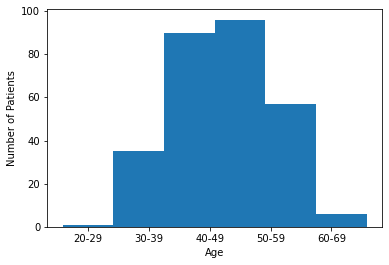

In [4]:
#Sort by age
bc_age_sort = bc_df.sort_values(by='Age')
#Make histogram of patient ages
plt.hist(bc_age_sort['Age'], bins=6, align='left')
plt.xlabel("Age")
plt.ylabel("Number of Patients")

# Visualization #2

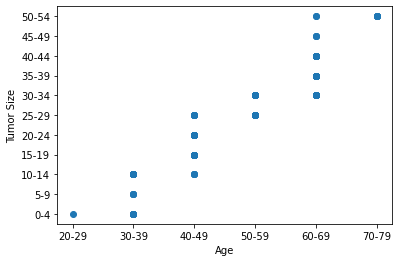

In [5]:
#Sort by tumor size make y axis make sense
f = lambda x: x.str.replace(',','', regex=True).str.extract('(\d+)-(\d+)', expand=True).astype(int).apply(tuple, 1)
bc_tumor_sort = bc_age_sort.sort_values('Tumor Size', key= f, ignore_index=True)

#Scatter plot of tumor size vs. age
plt.scatter(bc_age_sort['Age'], bc_tumor_sort['Tumor Size'])
plt.xlabel("Age")
plt.ylabel("Tumor Size")
plt.show()


# Visualization #3

([<matplotlib.axis.YTick at 0x7fdec4065460>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

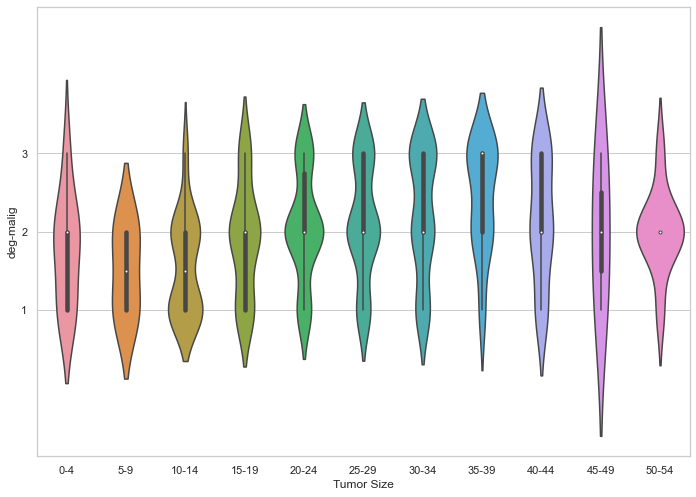

In [6]:
#Create Violin plot of Tumor Size vs Degree of Malignancy
sns.set_theme(style="whitegrid", palette="muted", rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(data=bc_tumor_sort, y=bc_tumor_sort['deg-malig'], x=bc_tumor_sort['Tumor Size'])
ax.set(ylabel="deg-malig", xlabel="Tumor Size")
plt.yticks([1,2,3])


# Visualization #5

([<matplotlib.axis.YTick at 0x7fded0f19e50>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

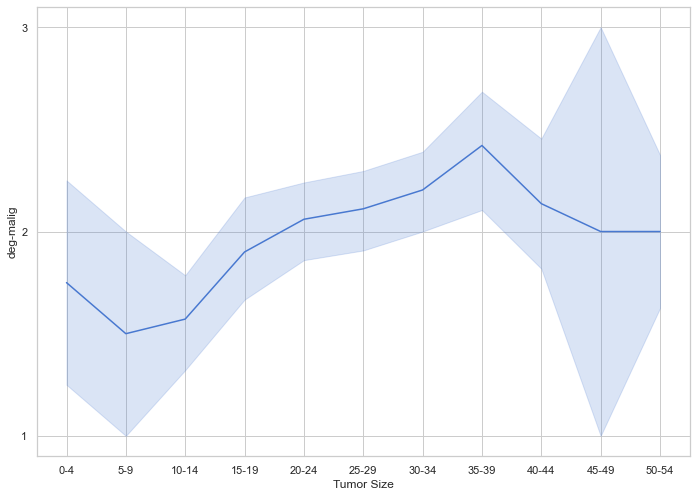

In [7]:
#Makes a line plot of tumor size vs. degree of malignancy
sns.lineplot(x=bc_tumor_sort['Tumor Size'], y=bc_tumor_sort['deg-malig'], sort=True)
plt.yticks([1,2,3])